In [1]:
# importando ass bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# carregando a base de dados
dados = pd.read_csv('houses_to_rent_v2.csv')
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
# criando um dicionário para alterar as colunas do dataset 
coluna = {'city':'Cidade', 'area':'Area', 'rooms':'Qnt_Quartos', 'bathroom':'Qnt_Banheiros', 'parking spaces':'Vagas_Garagem',
'floor':'Andar', 'animal':'Animal', 'furniture':'Mobiliada', 'hoa (R$)':'Valor_Condo', 'rent amount (R$)':'Valor_Aluguel', 'property tax (R$)':'IPTU',
'fire insurance (R$)':'Seguro_Incendio', 'total (R$)':'Valor_Total'}

In [4]:
# aplicando ao conjunto de dados os novos nomes das colunas
dados = dados.rename(columns = coluna)
dados.head()

,Cidade,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Andar,Animal,Mobiliada,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# dimensão do dataset, observa-se que tem 10692 registros e 13 colunas
dados.shape

(10692, 13)

In [6]:
# método para ter um panorama geral sobre o dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cidade           10692 non-null  object
 1   Area             10692 non-null  int64 
 2   Qnt_Quartos      10692 non-null  int64 
 3   Qnt_Banheiros    10692 non-null  int64 
 4   Vagas_Garagem    10692 non-null  int64 
 5   Andar            10692 non-null  object
 6   Animal           10692 non-null  object
 7   Mobiliada        10692 non-null  object
 8   Valor_Condo      10692 non-null  int64 
 9   Valor_Aluguel    10692 non-null  int64 
 10  IPTU             10692 non-null  int64 
 11  Seguro_Incendio  10692 non-null  int64 
 12  Valor_Total      10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Utilizando o método *info()* podemos perceber que os dados correspondem com seus tipos, exceto pela coluna *Andar* que ta definida com o tipo
*Object*.

In [7]:
# reumo estatístico
dados.describe()

,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [8]:
# resumo estatístico para as colunas que são categóricas
dados.describe(include = 'object')

,Cidade,Andar,Animal,Mobiliada
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


A coluna *Andar* do dataset é bem curiosa, o resumo estatístico acima aponta que os dados com maior frequência para esta coluna é " - " (um traço) e também é o top registro


In [9]:
# gerando uma cópia do dataframe
dados_copia = dados.copy()

In [10]:
# filtrando algumas colunas para análise
colunas_Selecionadas = ['Cidade', 'Qnt_Quartos','Valor_Aluguel']
dados_agrupado = dados_copia.filter(items = colunas_Selecionadas)
dados_agrupado.head()

,Cidade,Qnt_Quartos,Valor_Aluguel
0,São Paulo,2,3300
1,São Paulo,4,4960
2,Porto Alegre,1,2800
3,Porto Alegre,2,1112
4,São Paulo,1,800


In [11]:
# obtendo a quantidade de registro de aluguel para cada cidade no dataframe
dados_agrupado.groupby('Cidade').size()

Cidade
Belo Horizonte    1258
Campinas           853
Porto Alegre      1193
Rio de Janeiro    1501
São Paulo         5887
dtype: int64

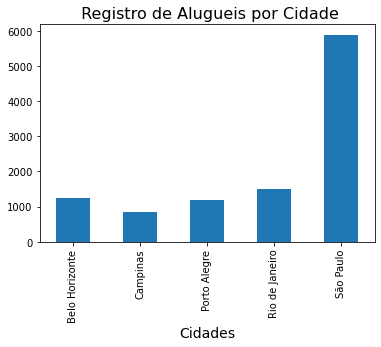

In [12]:
# gerando um gráfico de barras para visualizar esses dados
dados_agrupado.groupby('Cidade').size().plot(kind = 'bar')
plt.title(' Registro de Alugueis por Cidade', fontdict = {'size': 16})
plt.xlabel('Cidades', fontdict = {'size': 14})
plt.show()

In [13]:
# obtendo os valores maximos para quartos e valor de aluguel por cidade
dados_agrupado.groupby('Cidade').max()

,Qnt_Quartos,Valor_Aluguel
Cidade,,
Belo Horizonte,10,15000
Campinas,7,15000
Porto Alegre,8,19000
Rio de Janeiro,13,15000
São Paulo,10,45000


In [14]:
# obtendo a média para quartos e valor de aluguel
dados_agrupado.groupby('Cidade').mean()

,Qnt_Quartos,Valor_Aluguel
Cidade,,
Belo Horizonte,3.020668,3664.127981
Campinas,2.355217,2364.290739
Porto Alegre,2.140821,2337.699916
Rio de Janeiro,2.243837,3232.904064
São Paulo,2.558859,4652.793783


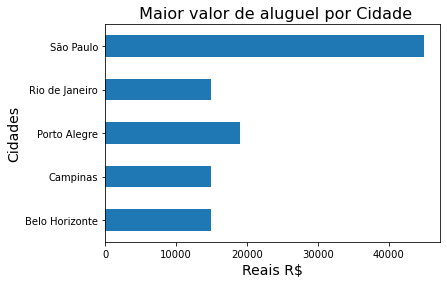

In [15]:
# visualizando os dados com o gráfico de barras para valores maximos por cidades 
dados_agrupado.groupby('Cidade')['Valor_Aluguel'].max().plot(kind = 'barh')
plt.title(' Maior valor de aluguel por Cidade', fontdict = {'size': 16})
plt.xlabel('Reais R$', fontdict = {'size': 14})
plt.ylabel('Cidades', fontdict = {'size':14})
plt.show()

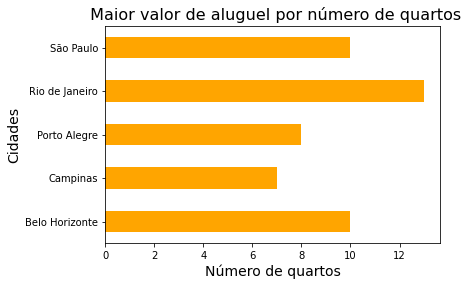

In [16]:
# visualizando os dados no gráfico para valores maximos de quartos por cidade
dados_agrupado.groupby('Cidade')['Qnt_Quartos'].max().plot(kind = 'barh', color = 'orange')
plt.title(' Maior valor de aluguel por número de quartos', fontdict = {'size': 16})
plt.ylabel('Cidades', fontdict = {'size': 14})
plt.xlabel('Número de quartos', fontdict = {'size': 14})
plt.show()

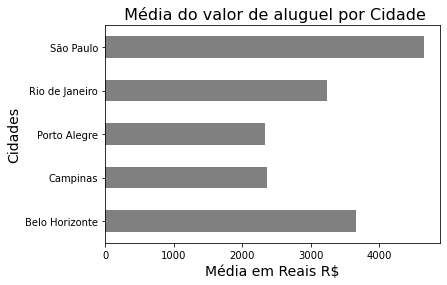

In [17]:
# visualizando a media do valor do aluguel por cidades
dados_agrupado.groupby('Cidade')['Valor_Aluguel'].mean().plot(kind = 'barh', color = 'Grey')
plt.title(' Média do valor de aluguel por Cidade', fontdict = {'size': 16})
plt.xlabel('Média em Reais R$', fontdict = {'size': 14})
plt.ylabel('Cidades', fontdict = {'size':14})
plt.show()

In [18]:
# contagem dos valores presente na coluna Andar
dados_copia['Andar'].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
301       1
46        1
51        1
35        1
Name: Andar, dtype: int64

In [19]:
# obtendo os valores únicos para Andar
dados_copia['Andar'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

Então como percebemos anteriormente a coluna *andar* tem algumas características a serem consideradas para o tratamento dos dados. existem dois valores atipicos nessa coluna, considerando que se trata de aluguel de imóveis, os valores '301' e '51' são contados uma vez e se diferenciam muito dos outros registros observados. e também nota-se que '-' (o traço) identificado anteriormente provavelmente são de imóveis terreos. 

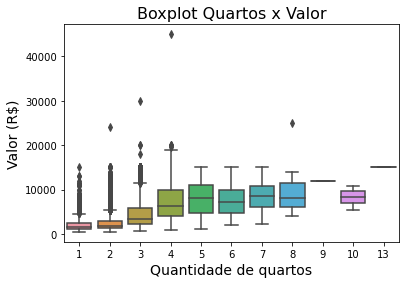

In [20]:
# boxplot para checar outilier e distribuição da quantidade de quartos em relação ao valor 
sns.boxplot(x = 'Qnt_Quartos', y = 'Valor_Aluguel', data = dados_agrupado)
plt.xlabel('Quantidade de quartos', fontdict = {'size':14})
plt.ylabel('Valor (R$)', fontdict = {'size':14})
plt.title('Boxplot Quartos x Valor', fontdict = {'size':16})
plt.show()

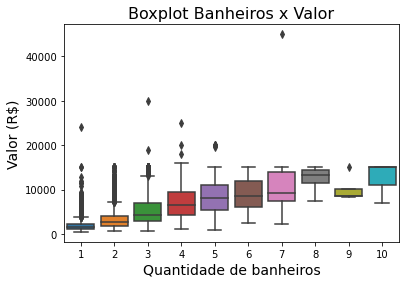

In [21]:
# boxplot para banheiros em relação ao valor
sns.boxplot(x = 'Qnt_Banheiros', y = 'Valor_Aluguel', data = dados_copia)
plt.xlabel('Quantidade de banheiros', fontdict = {'size':14})
plt.ylabel('Valor (R$)', fontdict = {'size':14})
plt.title('Boxplot Banheiros x Valor', fontdict = {'size':16})
plt.show()

In [22]:
# método do numpy que retorna a contagem dentro de cada bin e as bordas do histograma
cont, bin_edges = np.histogram(dados_copia['Valor_Aluguel'])
print(cont)
print(bin_edges)

[7952 1800  632  297    7    2    1    0    0    1]
[  450.  4905.  9360. 13815. 18270. 22725. 27180. 31635. 36090. 40545.
 45000.]


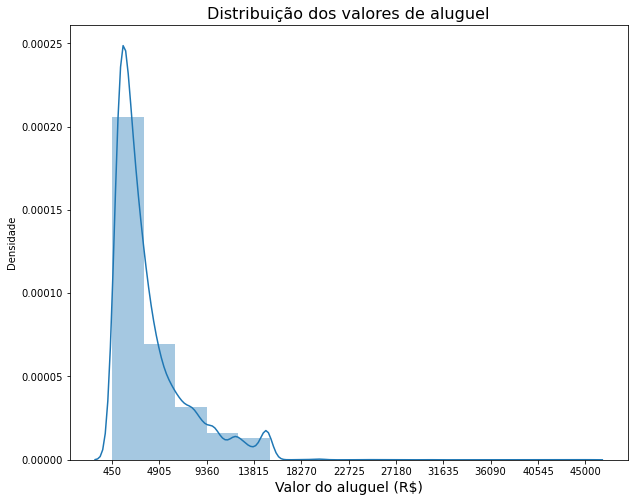

In [23]:
# observando a distribuição dos valores de aluguel 
plt.figure(figsize = (10, 8 ))
sns.distplot(dados_copia['Valor_Aluguel'], kde = True, bins = 15)
plt.xticks(ticks = bin_edges)
plt.xlabel('Valor do aluguel (R$)', fontdict = {'size': 14})
plt.ylabel('Densidade')
plt.title('Distribuição dos valores de aluguel', fontdict = {'size': 16})
plt.show()

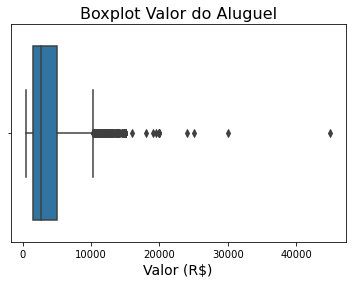

In [24]:
# boxplot do valor de aluguel 
sns.boxplot(dados['Valor_Aluguel'])
plt.title('Boxplot Valor do Aluguel', fontdict = {'size': 16})
plt.xlabel('Valor (R$)', fontdict = {'size': 14})
plt.show()

Observa-se que a coluna *Valor_Aluguel* tem alguns registros que são considerados outliers. Teremos que ponderar exluir alguns desses registros para deixar o modelo de Machine Learning mais genelarizado

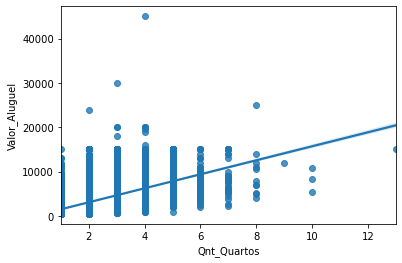

In [25]:
# como será o relacionamento entre a quantidade de quartos com a variavel alvo 
sns.regplot(x = 'Qnt_Quartos', y = 'Valor_Aluguel', data = dados_copia)
plt.show()

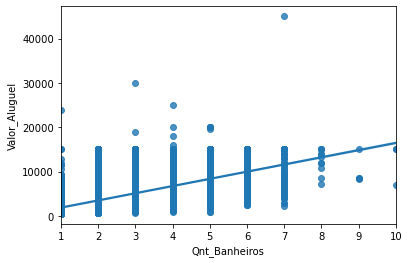

In [26]:
# relacionamento entre a variavel banheiros com a variavel alvo
sns.regplot(x = 'Qnt_Banheiros', y = 'Valor_Aluguel', data = dados_copia)
plt.show()

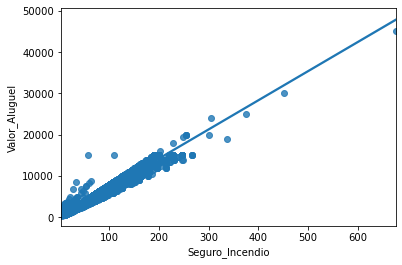

In [27]:
# seguro de incêncido x valor do aluguel
sns.regplot(x = 'Seguro_Incendio', y = 'Valor_Aluguel', data = dados_copia)
plt.show()

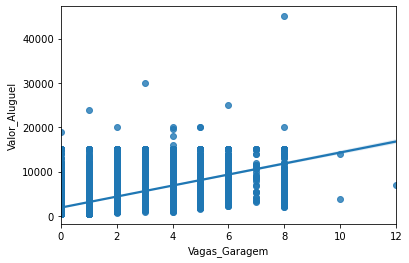

In [28]:
# vagas na garagem x valor do aluguel
sns.regplot(x = 'Vagas_Garagem', y = 'Valor_Aluguel', data = dados_copia)
plt.show()

In [29]:
# correlação entre as variaveis
dados_copia.corr()

,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
Area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
Qnt_Quartos,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
Qnt_Banheiros,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
Vagas_Garagem,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
Valor_Condo,0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
Valor_Aluguel,0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
IPTU,0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
Seguro_Incendio,0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
Valor_Total,0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


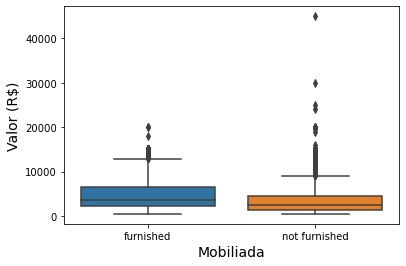

In [30]:
# boxplot da feature mobiliada
sns.boxplot(x = 'Mobiliada', y = 'Valor_Aluguel', data = dados_copia)
plt.xlabel('Mobiliada', fontdict = {'size': 14})
plt.ylabel('Valor (R$)', fontdict = {'size': 14})
plt.show()

Pude observar que as variaveis Quartos, Banheiros, Seguro incêndio e vagas na garagem tem uma relação linear boas para prever a variavel alvo Valor do aluguel
e a variavel seguro incêndio batento uma correlação forte de 0.98 

In [31]:
# tratamento dos dados da coluna andar
dados_copia['Andar'].replace('-', 0, inplace = True)

In [32]:
# interpretando esses dados provavelmente essa observação era para imóveis terreos e então atribui o valor 0 a essa observação
dados_copia['Andar'].value_counts().head()

0    2461
1    1081
2     985
3     931
4     748
Name: Andar, dtype: int64

In [33]:
# alterando o tipo dos dados para o correto agora
dados_copia['Andar'] = dados_copia['Andar'].astype(int)
dados_copia['Andar'].dtypes

dtype('int32')

In [34]:
# checando valores nulos
dados_copia.isnull().sum()

Cidade             0
Area               0
Qnt_Quartos        0
Qnt_Banheiros      0
Vagas_Garagem      0
Andar              0
Animal             0
Mobiliada          0
Valor_Condo        0
Valor_Aluguel      0
IPTU               0
Seguro_Incendio    0
Valor_Total        0
dtype: int64

In [35]:
# importanto o modulo LabelEncoder para transformar os dados categóricos
from sklearn.preprocessing import LabelEncoder

features_encoder = ['Cidade', 'Animal', 'Mobiliada']

encoder1 = LabelEncoder()
dados_copia['Cidade'] = encoder1.fit_transform(dados_copia['Cidade'])

encoder2 = LabelEncoder()
dados_copia['Animal'] = encoder2.fit_transform(dados_copia['Animal'])

encoder3 = LabelEncoder()
dados_copia['Mobiliada'] = encoder3.fit_transform(dados_copia['Mobiliada'])

In [36]:
# dataframe com os dados categóricos devidamente transformados
dados_copia.head(3)

,Cidade,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Andar,Animal,Mobiliada,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841


In [37]:
# rotulo para cada classe
encoder1.classes_

array(['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro',
       'São Paulo'], dtype=object)

In [51]:
# biblioteca pyod para detecção de outiliers
from pyod.models.mcd import MCD
from pyod.models.pca import PCA

In [39]:
dados_copia.head(1)

,Cidade,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Andar,Animal,Mobiliada,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618


In [40]:
# utilizando o algorito para a detecção
detector = MCD()
detector.fit(dados_copia)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [41]:
# obtendo as previsões de outiliers
previsão = detector.labels_
previsão

array([0, 1, 0, ..., 0, 0, 0])

In [42]:
# verificando a quantidade de outiliers registrados pelo algoritmo
np.unique(previsão, return_counts = True)

(array([0, 1]), array([9622, 1070], dtype=int64))

In [43]:
# obtendo os score e podemos ver que o algoritmo detectou o valor 483.94357385 como outilier 
confiança_previsão = detector.decision_scores_
confiança_previsão

array([ 21.11855748, 498.82968937,  23.38588513, ...,  39.36790896,
       108.26454026,  11.61188216])

In [44]:
# criando uma lista de outiliers
outliers = []
for i in range(len(previsão)):
    if previsão[i] == 1:
        outliers.append(i)

In [46]:
# gerando um dataframe de outliers
lista_outliers = dados_copia.iloc[outliers, :]
lista_outliers

,Cidade,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Andar,Animal,Mobiliada,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
5,4,376,3,3,7,0,0,1,0,8000,834,121,8955
7,4,213,4,4,4,4,0,1,2254,3223,1735,41,7253
17,3,88,2,3,1,9,1,0,1614,3500,221,16,5351
19,4,600,4,5,6,0,0,1,0,12000,9500,181,21680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,4,290,3,4,3,7,0,0,3900,8770,1834,112,14620
10619,0,360,1,1,8,0,0,1,0,2190,167,36,2393
10620,3,400,4,4,2,0,0,1,2000,15000,917,229,18150
10630,4,380,3,5,4,0,0,1,0,5500,1200,83,6783


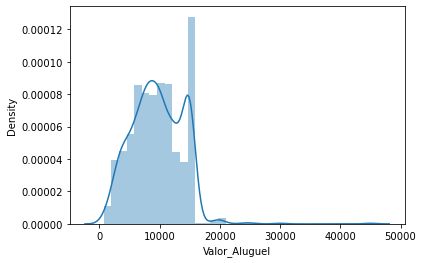

In [47]:
# plotando a distribuição do valor do aluguel desses outliers
sns.distplot(lista_outliers['Valor_Aluguel'], kde = True)
plt.show()

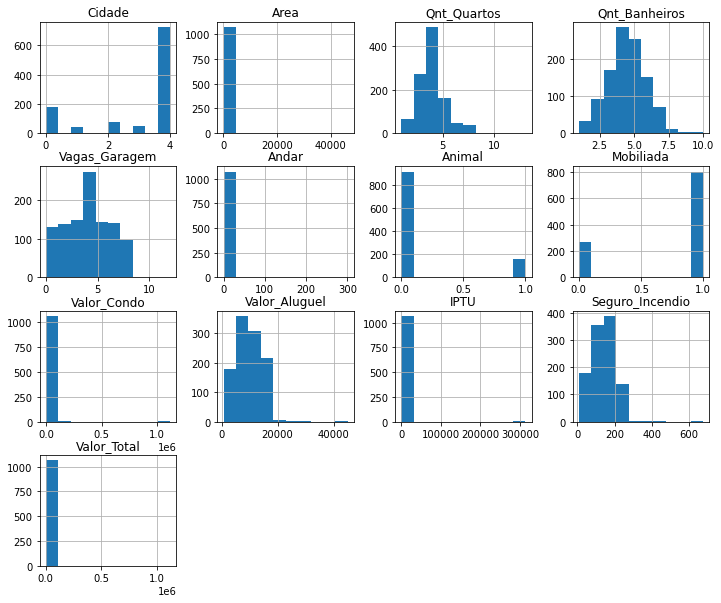

In [66]:
lista_outliers.hist(figsize = (12, 10))
plt.show()

Será que outro algoritmo se adequa melhor a esses dados?

In [52]:
detector1 = PCA()
detector1.fit(dados_copia)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [55]:
previsão1 = detector1.labels_
previsão1

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
np.unique(previsão1, return_counts = True)

(array([0, 1]), array([9622, 1070], dtype=int64))

In [59]:
detector1.decision_scores_

array([4.67407460e+08, 6.70364883e+08, 4.10315503e+08, ...,
       5.90550372e+08, 7.31148525e+08, 4.53335271e+08])

In [60]:
outliers1 = []
for i in range(len(previsão)):
    if previsão1[i] == 1:
        outliers1.append(i)

In [61]:
lista_outliers1 = dados_copia.iloc[outliers1, :]
lista_outliers1

,Cidade,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Andar,Animal,Mobiliada,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
5,4,376,3,3,7,0,0,1,0,8000,834,121,8955
8,4,152,2,2,1,3,0,0,1000,15000,250,191,16440
15,1,330,4,6,6,0,0,0,680,8000,328,121,9129
19,4,600,4,5,6,0,0,1,0,12000,9500,181,21680
20,4,100,7,4,0,0,0,1,0,3800,118,58,3976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,3,290,4,4,0,0,0,1,0,15000,750,229,15980
10669,4,340,4,5,3,15,1,0,3519,12000,1287,153,16960
10681,4,230,3,5,3,3,1,1,3800,11000,1100,140,16040
10686,4,150,3,3,2,8,1,0,0,13500,0,172,13670


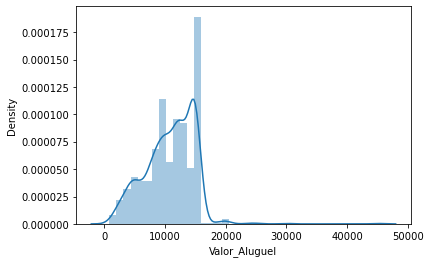

In [62]:
sns.distplot(lista_outliers1['Valor_Aluguel'], kde = True)
plt.show()

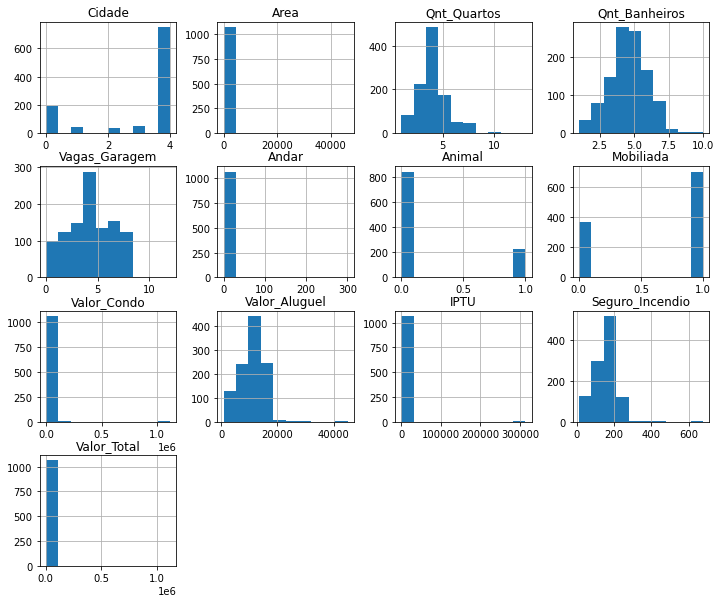

In [65]:
lista_outliers1.hist(figsize=(12,10))
plt.show()

Me parece que o algoritmo de PCA utilizado para detectar outiliers aqui nessa base de dados é uma melhor escolha !